Frequency 217.238530 GHz corresponds to channel: 783
target velocity = -185.10 km/s


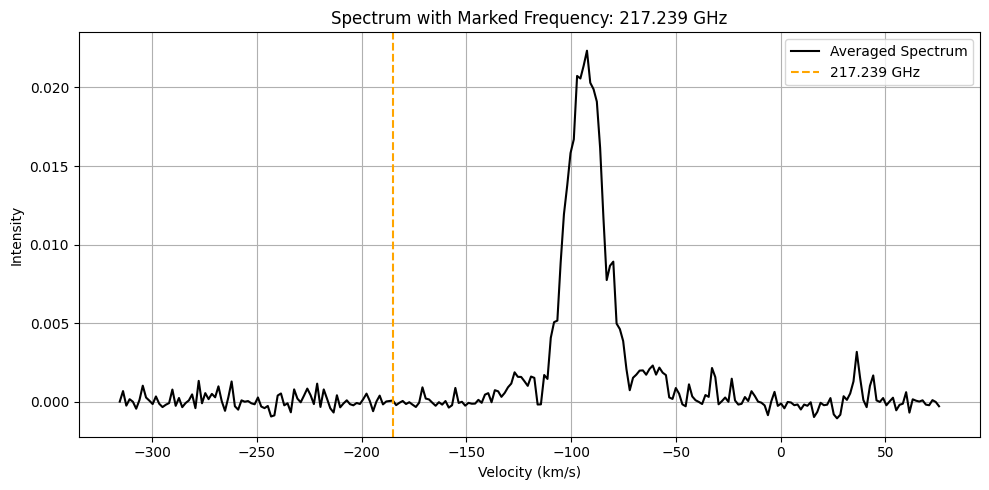

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# ==== Set parameters ====
cube_file = "/Users/ccc/Desktop/research/baobab/ALMA_project/datacubes/spw0.fits"
v1, v2 = 700, 950
x1, x2, y1, y2 = 220, 280, 70, 130
target_freq_GHz = 217.238530
target_freq_Hz = target_freq_GHz * 1e9
c_kms = 299792.458

# ==== Read data ====
data = fits.getdata(cube_file)[0]  # shape: (freq, y, x)
header = fits.getheader(cube_file)
subcube = data[v1:v2, y1:y2, x1:x2]

# ==== Prepare channel and velocity axes ====
CRVAL3 = header['CRVAL3']
CDELT3 = header['CDELT3']
CRPIX3 = header['CRPIX3']
RESTFREQ = header['RESTFREQ']
N_full = header['NAXIS3']

# Channel and velocity axis (full axis)
chan_all = np.arange(N_full)
velo_all = CRVAL3 + (chan_all + 1 - CRPIX3) * CDELT3  # m/s
velo_all_kms = velo_all / 1e3

# Doppler: velocity → frequency
freq_all_Hz = RESTFREQ * (1 - velo_all_kms / c_kms)
freq_all_GHz = freq_all_Hz / 1e9

# ==== Crop the desired range ====
velo = velo_all_kms[v1:v2]
freq = freq_all_GHz[v1:v2]

# ==== Spectrum averaging ====
spectrum = subcube.mean(axis=(1, 2))

# ==== Find the channel corresponding to the target frequency ====
diff = np.abs(freq_all_Hz - target_freq_Hz)
target_index = np.argmin(diff)
target_velocity = velo_all_kms[target_index]
print(f"Frequency {target_freq_GHz:.6f} GHz corresponds to channel: {target_index}")
print(f"target velocity = {target_velocity:.2f} km/s")

# ==== Plot ====
plt.figure(figsize=(10, 5))
plt.plot(velo, spectrum, label='Averaged Spectrum', color='black')
plt.axvline(target_velocity, color='orange', linestyle='--', label=f'{target_freq_GHz:.3f} GHz')
plt.xlabel('Velocity (km/s)')
plt.ylabel('Intensity')
plt.title(f"Spectrum with Marked Frequency: {target_freq_GHz:.3f} GHz")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


✅ 頻率 217.238530 GHz 相對於 rest freq 217.104980 GHz 的 LSR 速度為： -184.41 km/s


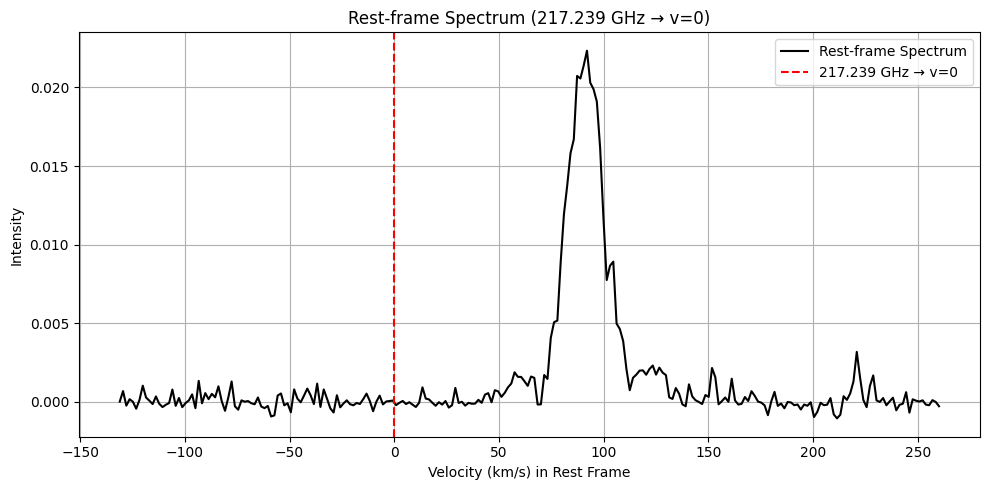

In [21]:
# ==== 將 target_freq 視為觀測頻率，計算相對於 rest 頻率的 Doppler 速度 ====
v_target_kms = c_kms * (1 - target_freq_Hz / RESTFREQ)
print(f"✅ 頻率 {target_freq_GHz:.6f} GHz 相對於 rest freq {RESTFREQ/1e9:.6f} GHz 的 LSR 速度為： {v_target_kms:.2f} km/s")

# ==== 繪圖：將此速度當成 v=0，平移光譜 ====
velo_shifted = velo - v_target_kms

plt.figure(figsize=(10, 5))
plt.plot(velo_shifted, spectrum, label='Rest-frame Spectrum', color='black')
plt.axvline(0, color='red', linestyle='--', label=f'{target_freq_GHz:.3f} GHz → v=0')
plt.xlabel('Velocity (km/s) in Rest Frame')
plt.ylabel('Intensity')
plt.title(f"Rest-frame Spectrum ({target_freq_GHz:.3f} GHz → v=0)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
